# Esse projeto tem como objetivo obter previsões sobre a economia brasileira para 2021, com base nos dados gerados ao longo dos 6 primeiros meses de 2020 sobre os seguintes índices: IPCA e Selic.

Os dados foram retirados do site do Banco Central, na janela de séries temporais, nessa sessão é possível escrever o código, tema ou título de indicador econômico. Os dados estão datados desde 01/01/2020 até dia 30/09/2020. Irei fazer uma análise desses 9 meses corridos porém a previsão será feita considerando somente os 6 primeiros meses do ano e como teste para saber se o modelo foi eficiente em sua predição.

Vamos iniciar realizando as importações das bibliotecas necessárias:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

Agora carregar as bases de dados IPCA e Selic:

In [2]:
ipca = pd.read_csv('../input/economia-brasileira/ipca.csv', sep = ';')
selic = pd.read_csv('../input/economia-brasileira/taxa_selic.csv', sep = ';')

In [3]:
ipca

,Data,13522 - Índice nacional de preços ao consumidor - amplo (IPCA) - em 12 meses - %
0,01/01/2020,4.19
1,01/02/2020,4.01
2,01/03/2020,3.30
3,01/04/2020,2.40
4,01/05/2020,1.88
5,01/06/2020,2.13
6,01/07/2020,2.31
7,01/08/2020,2.44


In [4]:
selic

,DateTime,Meta para taxa Selic
0,01/01/2020,4.5
1,02/01/2020,4.5
2,03/01/2020,4.5
3,04/01/2020,4.5
4,05/01/2020,4.5
...,...,...
270,27/09/2020,2.0
271,28/09/2020,2.0
272,29/09/2020,2.0
273,30/09/2020,2.0


Por questões estéticas irei alterar o nome das colunas, assim ficará melhor de visualizar:

In [5]:
ipca = ipca.rename(columns={'13522 - Índice nacional de preços ao consumidor - amplo (IPCA) - em 12 meses - %': 'IPCA'})
selic = selic.rename(columns={'Meta para taxa Selic': 'Selic'})

In [6]:
ipca

,Data,IPCA
0,01/01/2020,4.19
1,01/02/2020,4.01
2,01/03/2020,3.30
3,01/04/2020,2.40
4,01/05/2020,1.88
5,01/06/2020,2.13
6,01/07/2020,2.31
7,01/08/2020,2.44


In [7]:
selic

,DateTime,Selic
0,01/01/2020,4.5
1,02/01/2020,4.5
2,03/01/2020,4.5
3,04/01/2020,4.5
4,05/01/2020,4.5
...,...,...
270,27/09/2020,2.0
271,28/09/2020,2.0
272,29/09/2020,2.0
273,30/09/2020,2.0


Vamos analisar separadamente os indicadores, fazendo uma análise de cada um deles e fazendo um paralelo com políticas adotadas nesses últimos 6 meses e suas reflexões na economia nacional e internacional. Começando pela Taxa Básica de Juros, a Selic:

In [8]:
fig = go.Figure(go.Scatter(x = selic['DateTime'], y = selic['Selic'], name = 'Taxa Selic'))
fig.update_layout(title = 'Taxa Selic ao longo de 2020')
fig.show()

In [9]:
fig = go.Figure(go.Scatter(x = ipca['Data'], y = ipca['IPCA'], name = 'IPCA'))
fig.update_layout(title = 'IPCA ao longo de 2020')
fig.show()

In [10]:
fig = go.Figure(go.Scatter(x = selic['DateTime'], y = selic['Selic'], name = 'Taxa Selic'))
fig.add_trace(go.Scatter(x = ipca['Data'], y = ipca['IPCA'], name = 'IPCA'))
fig.update_layout(title = 'IPCA & Selic no ano de 2020')
fig.show()

# Prevendo a economia brasileira em 2021 com os dados dos 6 primeiros meses do ano de 2020:

Como requisitado, irei usar o ``ARIMA`` para realizar as previsões utilizando os dados dos seis primeiros meses. Irei prever a economia brasileira para os 6 primeiros meses de 2021.

Primeiro irei limitar os dados para que sejam utilizados somente os 6 primeiros meses de 2020:

In [11]:
pred_selic = selic.iloc[:182 , :]
pred_selic

,DateTime,Selic
0,01/01/2020,4.50
1,02/01/2020,4.50
2,03/01/2020,4.50
3,04/01/2020,4.50
4,05/01/2020,4.50
...,...,...
177,26/06/2020,2.25
178,27/06/2020,2.25
179,28/06/2020,2.25
180,29/06/2020,2.25


In [12]:
pred_ipca = ipca.iloc[:6 , :]
pred_ipca

,Data,IPCA
0,01/01/2020,4.19
1,01/02/2020,4.01
2,01/03/2020,3.30
3,01/04/2020,2.40
4,01/05/2020,1.88
5,01/06/2020,2.13


Vamos agora instalar e importar a biblioteca ``ARIMA`` para conseguir a previsão da economia brasileira para 2021:

In [13]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 401 kB/s 
     |████████████████████████████████| 2.1 MB 3.6 MB/s 
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [14]:
from pmdarima.arima import auto_arima

Vamos primeiro prever a Meta para a Taxa Selic. Vou prever para os próximos 12 meses, o que implica no segundo semestre de 2020 e os seis primeiros meses para 2021. Do dia 01/07/2020 até 30/06/2021 são 365 dias, sendo 253 úteis, 104 fins de semana e 10 feriados. O ``ARIMA`` acaba contabilizando esses 104 fins de semana e 10 feriados, então terei que usar todos os dias dos próximos 12 meses e só assim teremos as previsões até o dia 30/06/2021.

Para a realização da previsão do modelo, será necessário mudar o formato da data para aaaa-mm-dd e atualmente o nossa data está no formato dd/mm/aaaa

In [15]:
pred_selic.loc[:, "DateTime"] = pred_selic.DateTime.map(pd.Timestamp)
pred_ipca.loc[:, "Data"] = pred_ipca.Data.map(pd.Timestamp)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Por fim, agora é só fazer as últimas codificações para estar no formato correto para a realização da previsão, é necessário tirar as colunas que não serão usadas para a previsão.

In [16]:
pred_selic2 = pred_selic.Selic
pred_ipca2 = pred_ipca.IPCA

In [17]:
pred_selic = selic.iloc[:182 , :]
pred_selic.index = pred_selic.DateTime
pred_ipca = ipca.iloc[:6 , :]
pred_ipca.index = pred_ipca.Data

## Prevendo a Taxa Selic:

In [18]:
modelo_selic = auto_arima(pred_selic2)
previsao_selic = modelo_selic.predict(365)

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



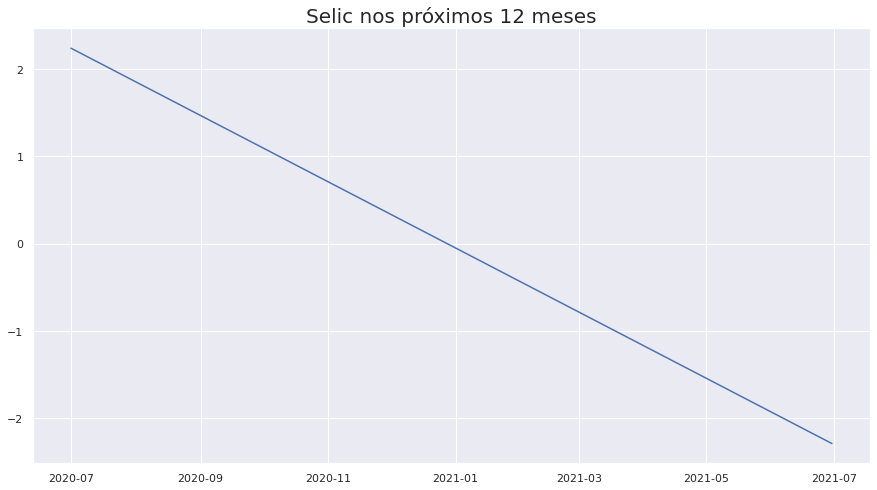

In [19]:
sns.set()
plt.figure(figsize=(15,8))
plt.plot(pd.date_range('2020-07-01', '2021-06-30'), previsao_selic)
plt.ylabel('')
plt.xlabel('')
plt.title('Selic nos próximos 12 meses', fontsize = 20);
plt.show()

## Prevendo o IPCA:

In [20]:
modelo_ipca = auto_arima(pred_ipca2)
previsao_ipca = modelo_ipca.predict(365)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning:

Too few observations to estimate s

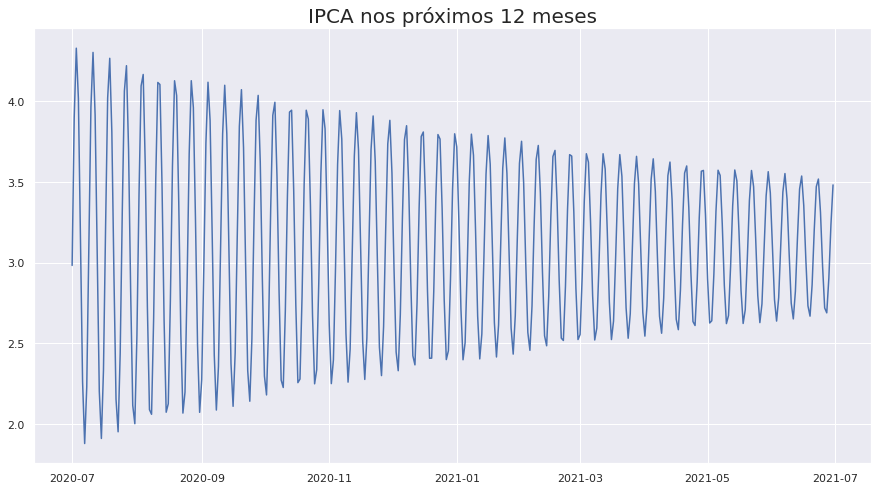

In [21]:
sns.set()
plt.figure(figsize=(15,8))
plt.plot(pd.date_range('2020-07-01', '2021-06-30'), previsao_ipca)
plt.ylabel('')
plt.xlabel('')
plt.title('IPCA nos próximos 12 meses', fontsize = 20);
plt.show()

## Analisando os dois índices juntos:

In [22]:
fig = go.Figure(go.Scatter(x = pd.date_range('2020-07-01', '2021-06-30'), y = previsao_selic, name = 'Previsão da Meta para a Taxa Selic'))
fig.add_trace(go.Scatter(x = pd.date_range('2020-07-01', '2021-06-30'), y = previsao_ipca, name = 'Previsão para o IPCA'))
fig.update_layout(title = 'Economia Brasileira em 2021')
fig.show()